In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.insert(1, os.sep.join(["..", "packages"]))
from basicDistributionFunctions import characterist_r_i
from alphastable import multivariate_alphastable

In [3]:
Image_width = 10
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})

EXTRA_SMALL = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
def get_alpha(X, t):
    X = MA
    Re_char_X = Re
    Y = np.log(-np.log(np.abs(Re_char_X))).T
    X = np.vstack((np.log(t), np.ones(len(Y)))).T
    alpha, _ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return alpha

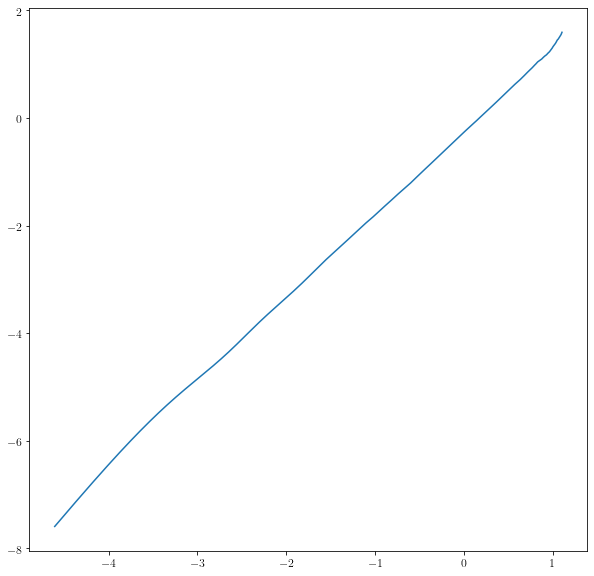

In [5]:
N = 10 ** 4
gamma = [0.25, 0.125, 0.25, 0.25, 0.125, 0.25]
points = [[1, 0], [0.5, np.sqrt(3)/2],
            [-1/2, np.sqrt(3)/2], [-1, 0],
            [-1/2, -np.sqrt(3)/2], [1/2, -np.sqrt(3)/2]] 
alpha = 1.5
MA = multivariate_alphastable(alpha, gamma, points, N)
t = np.linspace(0.01, 3, N)
Re = characterist_r_i(t, MA[:, 0])[0]

fig, ax = plt.subplots(figsize = (Image_width, Image_width))
ax.plot(np.log(t), np.log(-np.log(np.abs(Re))));

In [6]:
get_alpha(MA, t)

1.5532275527413304

## Gamma estimation

In [10]:
n = 30
E = np.arange(0, 2*np.pi, np.pi / n)
R = np.arange(10, 60, 5)
Gamma = np.ones((len(E), len(R)))
Gamma[:] = np.nan

for k in range(len(E)):
    e = E[k]
    for j in range(len(R)):
        r = R[j]
        counter_1 = 0
        counter_2 = 0
        for i in range(len(MA)):
            if np.arctan2(MA[i][0], MA[i][1]) < e and np.linalg.norm(MA[i]) > r:
                counter_1 += 1
            if np.linalg.norm(MA[i]) > r:
                counter_2 += 1
        if counter_2 != 0:
            Gamma[k, j] = counter_1 / counter_2

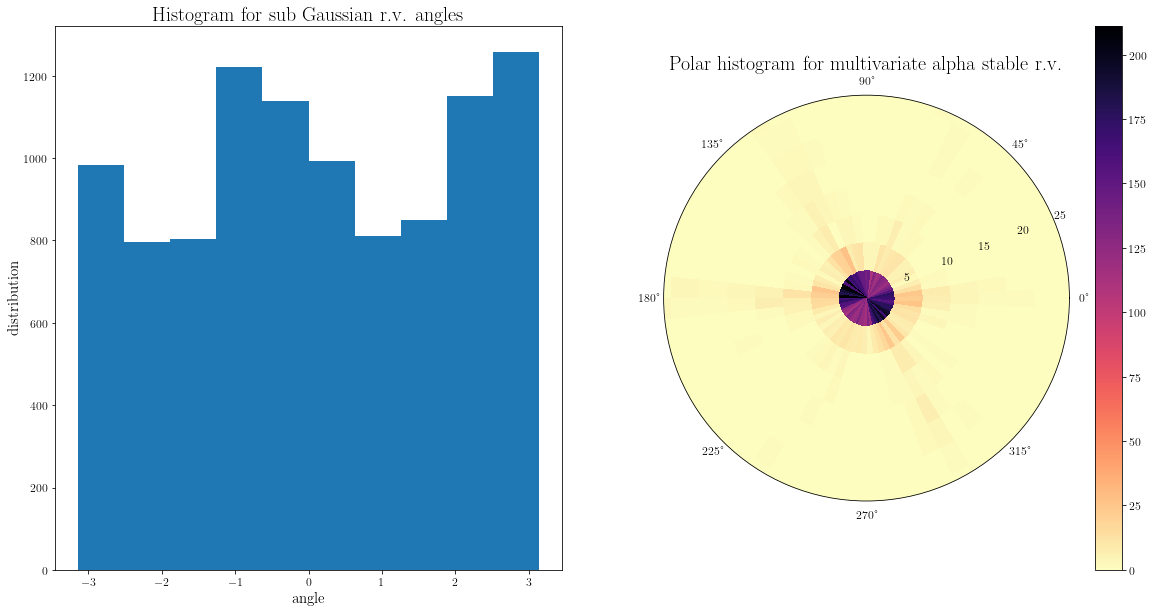

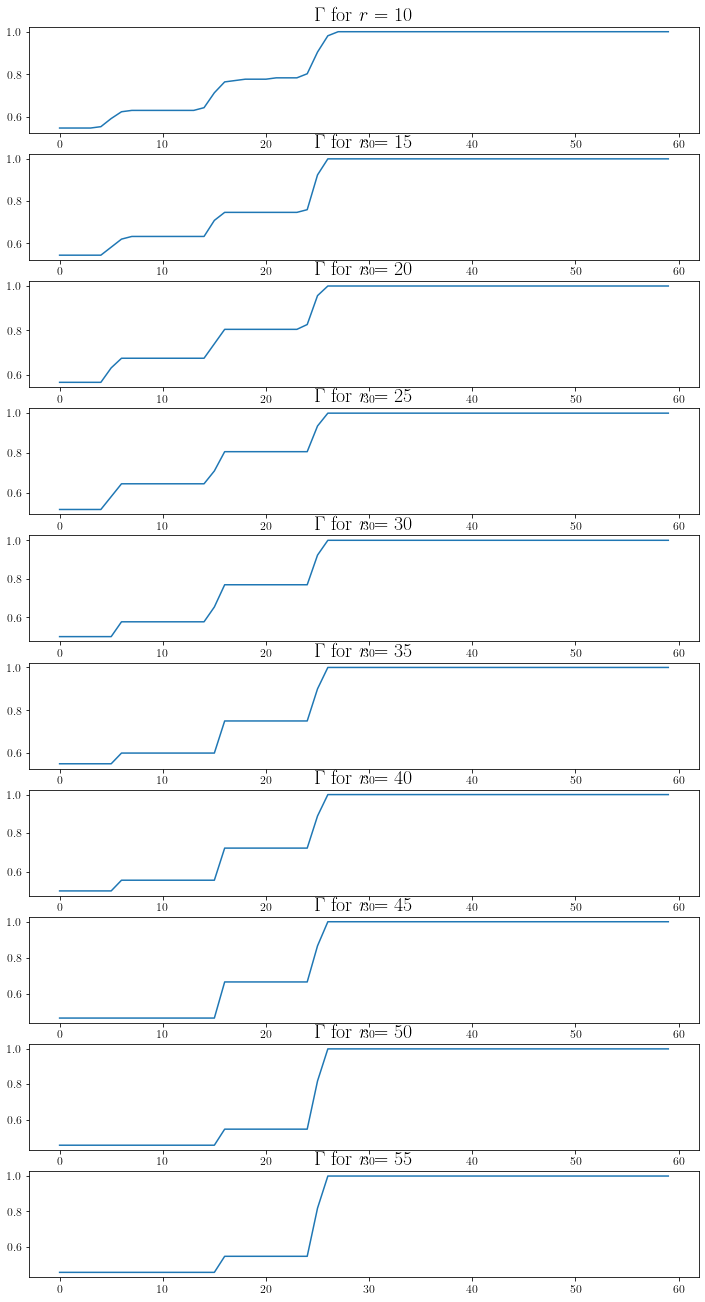

In [14]:
fig = plt.figure(figsize = (2 * Image_width, Image_width))
Points_angles = np.ones(N)
Points_radius = np.ones(N)
for i, val in enumerate(MA):
    Points_angles[i] = np.arctan2(MA[i][1], MA[i][0]) # first one is  y coordinate and the second is x coordinate
    Points_radius[i] = np.linalg.norm(MA[i])
ax1 = fig.add_subplot(121)
ax1.hist(Points_angles)
ax1.set_title("Histogram for sub Gaussian r.v. angles")
ax1.set_xlabel("angle")
ax1.set_ylabel("distribution")

ax2 = fig.add_subplot(122, polar = True)
rbins = np.linspace(0, Points_radius.max(), 50)
abins = np.linspace(-np.pi, np.pi, 60)
hist, _, _ = np.histogram2d(Points_angles, Points_radius, bins = (abins, rbins))
Angles, Rad = np.meshgrid(abins, rbins)
ax2.grid(False)
pc = ax2.pcolormesh(Angles, Rad, hist.T, cmap = "magma_r")
ax2.set_ylim([0, 25])
ax2.set_title("Polar histogram for multivariate alpha stable r.v.")
fig.colorbar(pc);

fig, ax = plt.subplots(nrows = len(R), figsize = (1.2 * Image_width, 2.3 * Image_width))
for i, r in enumerate(R):
    ax[i].plot(Gamma[:, i])
    ax[i].set_title(f"$\Gamma$ for $r = {r}$")